In [1]:
# Turn on multi-threading on your computer for faster calculation
%env OMP_NUM_THREADS = 4

env: OMP_NUM_THREADS=4


In [2]:
# Step 2: Load the necessary packages and libaries

import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
#df = pd.read_csv('6722-pilot-customers.csv', header = 0, sep = ",")
df= pd.read_csv('6722-credit-card-default-data.csv', header = 0, sep = ",")


df.head() # show the "head" -- first 5 rows of the data; note, these are rows 0...4

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,3,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         24000 non-null  int64  
 1   LIMIT_BAL  24000 non-null  float64
 2   SEX        24000 non-null  int64  
 3   EDUCATION  24000 non-null  int64  
 4   MARRIAGE   24000 non-null  int64  
 5   AGE        24000 non-null  int64  
 6   PAY_1      24000 non-null  int64  
 7   PAY_2      24000 non-null  int64  
 8   PAY_3      24000 non-null  int64  
 9   PAY_4      24000 non-null  int64  
 10  PAY_5      24000 non-null  int64  
 11  PAY_6      24000 non-null  int64  
 12  BILL_AMT1  24000 non-null  float64
 13  BILL_AMT2  24000 non-null  float64
 14  BILL_AMT3  24000 non-null  float64
 15  BILL_AMT4  24000 non-null  float64
 16  BILL_AMT5  24000 non-null  float64
 17  BILL_AMT6  24000 non-null  float64
 18  PAY_AMT1   24000 non-null  float64
 19  PAY_AMT2   24000 non-null  float64
 20  PAY_AM

In [5]:
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['PAY1'] = df['PAY_1'].astype('category')
df['PAY2'] = df['PAY_2'].astype('category')
df['PAY3'] = df['PAY_3'].astype('category')
df['PAY4'] = df['PAY_4'].astype('category')
df['PAY5'] = df['PAY_5'].astype('category')
df['PAY6'] = df['PAY_6'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         24000 non-null  int64   
 1   LIMIT_BAL  24000 non-null  float64 
 2   SEX        24000 non-null  category
 3   EDUCATION  24000 non-null  category
 4   MARRIAGE   24000 non-null  category
 5   AGE        24000 non-null  int64   
 6   PAY_1      24000 non-null  int64   
 7   PAY_2      24000 non-null  int64   
 8   PAY_3      24000 non-null  int64   
 9   PAY_4      24000 non-null  int64   
 10  PAY_5      24000 non-null  int64   
 11  PAY_6      24000 non-null  int64   
 12  BILL_AMT1  24000 non-null  float64 
 13  BILL_AMT2  24000 non-null  float64 
 14  BILL_AMT3  24000 non-null  float64 
 15  BILL_AMT4  24000 non-null  float64 
 16  BILL_AMT5  24000 non-null  float64 
 17  BILL_AMT6  24000 non-null  float64 
 18  PAY_AMT1   24000 non-null  float64 
 19  PAY_AMT2   24000 non-null

In [6]:
#check for missing data
pd.DataFrame(df).isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
PAY1         0
PAY2         0
PAY3         0
PAY4         0
PAY5         0
PAY6         0
dtype: int64

In [7]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(df, 10)

df[0:10] #lets check the result

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,1,2,2,-1,-1,-2,-2
1,2,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,0,0,0,0,0,0
2,3,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,0,0,0,0,0,0
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,-1,0,-1,0,0,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,1000.0,1000.0,800.0,0,0,0,0,0,0,0
5,6,100000.0,2,2,2,23,0,-1,-1,0,...,581.0,1687.0,1542.0,0,0,-1,-1,0,0,-1
6,7,140000.0,2,3,1,28,0,0,2,0,...,1000.0,1000.0,1000.0,0,0,0,2,0,0,0
7,8,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,1122.0,0.0,0,-2,-2,-2,-2,-1,-1
8,9,200000.0,2,3,2,34,0,0,2,0,...,300.0,3738.0,66.0,0,0,0,2,0,0,-1
9,10,260000.0,2,1,2,51,-1,-1,-1,-1,...,22301.0,0.0,3640.0,0,-1,-1,-1,-1,-1,2


In [8]:
y = df['DEFAULT']
X = df.drop(columns=['DEFAULT'])

In [9]:
# split the data randomly into 80% train and 20% test samples
np.random.seed(77300)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# First we define a set of functions to compute the metrics of the model

# ROC curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# RUN LOGISTIC REGRESSION MODEL AND CHECK FOR ACCURACY

In [12]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [14]:
y_pred_prob = model.predict_proba(X_test_scaled)[:,1] # probabilities

credit_threshold = 0.329

y_pred_ = np.where(y_pred_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred_[0:5]) # resultant predicted classification
print(y_test[0:5]) # actual outcomes

[0.19703187 0.59256622 0.03340845 0.18750427 0.36627559]
[0 1 0 0 1]
14634    0
7633     1
5598     0
6502     0
20174    0
Name: DEFAULT, dtype: int64


Metrics of the logistic regression model: 

Confusion matrix: 
[[3632  810]
 [ 107  251]]
                                   Accuracy: 0.8089583333333333
                   SENSITIVITY (aka RECALL): 0.236569274269557
                 SPECIFICITY (aka FALL-OUT): 0.9713827226531158
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.7011173184357542
                 NEGATIVE PREDICTIVE VALUE): 0.8176497073390365


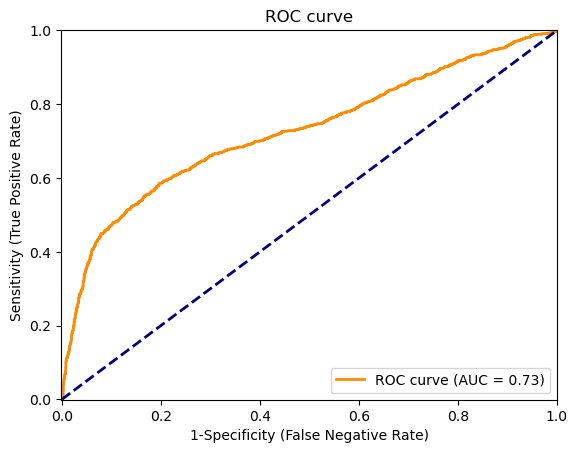

 AUC: 0.7267566388267035


In [15]:
# Lets look at the model metrics
print('Metrics of the logistic regression model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

# COMPARE MODEL USING RANDOM FOREST, GRADIENT BOOSTING

In [16]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

y_pred_prob = rf_model.predict_proba(X_test_scaled)[:,1] # probabilities

y_pred_rf = np.where(y_pred_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred_rf[0:5]) # resultant predicted classification
print(y_test[0:5]) 

[0.42 0.72 0.03 0.11 0.31]
[1 1 0 0 0]
14634    0
7633     1
5598     0
6502     0
20174    0
Name: DEFAULT, dtype: int64


Metrics of the Random Forest model: 

Confusion matrix: 
[[3240  491]
 [ 499  570]]
                                   Accuracy: 0.79375
                   SENSITIVITY (aka RECALL): 0.5372290292177191
                 SPECIFICITY (aka FALL-OUT): 0.8665418561112597
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.5332086061739943
                 NEGATIVE PREDICTIVE VALUE): 0.8683998927901367


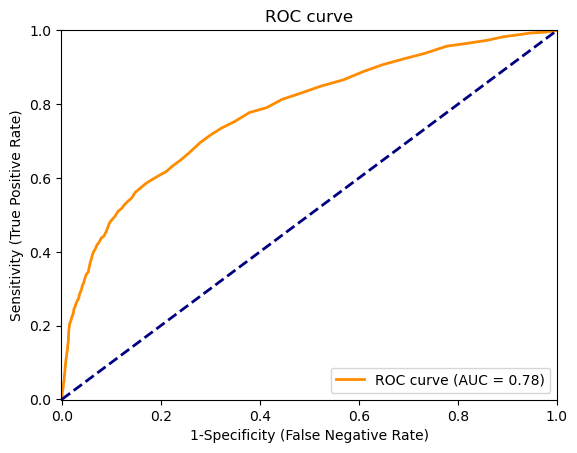

 AUC: 0.7782195665879101


In [17]:
# Lets look at the model metrics
print('Metrics of the Random Forest model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred_rf))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred_rf)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred_rf)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred_rf)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred_rf)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred_rf)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [18]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_y_pred = gb_model.predict(X_test_scaled)

In [19]:
y_pred_prob = gb_model.predict_proba(X_test_scaled)[:,1] # probabilities
y_pred_gb = np.where(y_pred_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred_gb[0:5]) # resultant predicted classification
print(y_test[0:5]) #actual results

[0.18011999 0.67700272 0.0364696  0.12105063 0.37120166]
[0 1 0 0 1]
14634    0
7633     1
5598     0
6502     0
20174    0
Name: DEFAULT, dtype: int64


Metrics of the Gradient Boosting model: 

Confusion matrix: 
[[3390  529]
 [ 349  532]]
                                   Accuracy: 0.8170833333333334
                   SENSITIVITY (aka RECALL): 0.5014137606032045
                 SPECIFICITY (aka FALL-OUT): 0.9066595346349291
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.6038592508513053
                 NEGATIVE PREDICTIVE VALUE): 0.8650165858637408


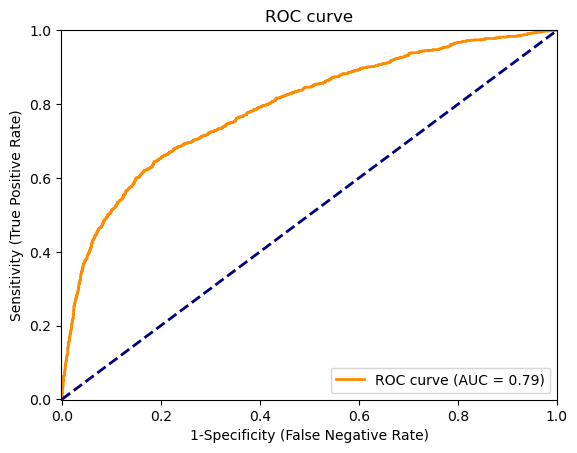

 AUC: 0.7903125952369489


In [20]:
# Lets look at the model metrics
print('Metrics of the Gradient Boosting model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred_gb))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred_gb)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred_gb)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred_gb)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred_gb)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred_gb)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

# feature engineering 

In [21]:
# Feature engineering: Create new features
#Summarize payment information across months.
df['TOTAL_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['TOTAL_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
df['PAY_TO_BILL_RATIO'] = df['TOTAL_PAY_AMT'] / (df['TOTAL_BILL_AMT'] + 1e-5)


In [22]:
#Create features to capture delinquency behavior
df['DELINQ_CYCLES'] = (df['PAY_1'] > 0).astype(int) + (df['PAY_2'] > 0).astype(int) + \
                        (df['PAY_3'] > 0).astype(int) + (df['PAY_4'] > 0).astype(int) + \
                        (df['PAY_5'] > 0).astype(int) + (df['PAY_6'] > 0).astype(int)


In [23]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAY_TO_BILL_RATIO,DELINQ_CYCLES
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,2,2,-1,-1,-2,-2,7704.0,689.0,0.089434,2
1,2,90000.0,2,2,2,34,0,0,0,0,...,0,0,0,0,0,0,101653.0,11018.0,0.108388,0
2,3,50000.0,2,2,1,37,0,0,0,0,...,0,0,0,0,0,0,231334.0,8388.0,0.036259,0
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,-1,0,-1,0,0,0,109339.0,59049.0,0.540054,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,0,0,0,0,0,0,238114.0,7772.0,0.032640,0


In [24]:
y = df['DEFAULT']
X = df.drop(columns=['DEFAULT'])

In [25]:
# split the data randomly into 80% train and 20% test samples
np.random.seed(30)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_y_pred = gb_model.predict(X_test_scaled)

In [28]:
y_pred_prob = gb_model.predict_proba(X_test_scaled)[:,1] # probabilities

credit_threshold = 0.329

y_pred_ = np.where(y_pred_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred_[0:5]) # resultant predicted classification
print(y_test[0:5]) #actual results

[0.09725445 0.1162833  0.54654982 0.10252603 0.57175649]
[0 0 1 0 1]
4875     0
20496    0
21213    0
14529    0
13940    1
Name: DEFAULT, dtype: int64


Metrics of the Gradient Boosting model: 

Confusion matrix: 
[[3460  982]
 [ 279   79]]
                                   Accuracy: 0.7372916666666667
                   SENSITIVITY (aka RECALL): 0.07445805843543826
                 SPECIFICITY (aka FALL-OUT): 0.9253811179459749
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.2206703910614525
                 NEGATIVE PREDICTIVE VALUE): 0.7789284106258442


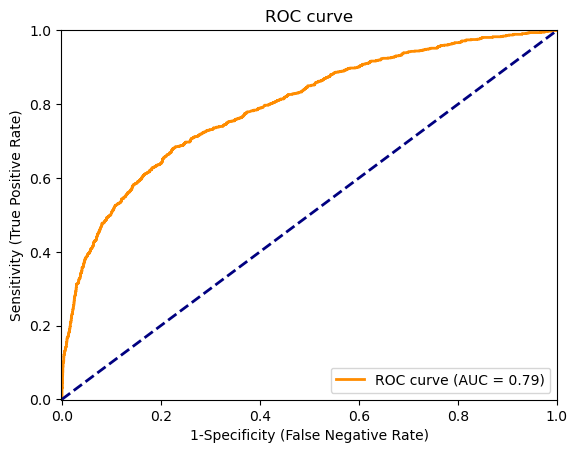

 AUC: 0.7932217886258377


In [29]:
# Lets look at the model metrics
print('Metrics of the Gradient Boosting model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

# load the pilot data 

In [30]:
data= pd.read_csv('6722-pilot-customers.csv', header = 0, sep = ",")

In [31]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,n1000-1,500000.0,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770
1,n1000-2,210000.0,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0.0,0.0,0.0,0,0.0,0
2,n1000-3,150000.0,1,1,2,27,0,0,0,0,...,89006,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800
3,n1000-4,20000.0,1,2,1,38,0,0,0,0,...,19559,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0
4,n1000-5,400000.0,1,2,1,34,-1,-1,-1,-1,...,11867,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   object 
 1   LIMIT_BAL  1000 non-null   float64
 2   SEX        1000 non-null   int64  
 3   EDUCATION  1000 non-null   int64  
 4   MARRIAGE   1000 non-null   int64  
 5   AGE        1000 non-null   int64  
 6   PAY_1      1000 non-null   int64  
 7   PAY_2      1000 non-null   int64  
 8   PAY_3      1000 non-null   int64  
 9   PAY_4      1000 non-null   int64  
 10  PAY_5      1000 non-null   int64  
 11  PAY_6      1000 non-null   int64  
 12  BILL_AMT1  1000 non-null   int64  
 13  BILL_AMT2  1000 non-null   int64  
 14  BILL_AMT3  1000 non-null   int64  
 15  BILL_AMT4  1000 non-null   int64  
 16  BILL_AMT5  1000 non-null   int64  
 17  BILL_AMT6  1000 non-null   int64  
 18  PAY_AMT1   1000 non-null   float64
 19  PAY_AMT2   1000 non-null   float64
 20  PAY_AMT3 

In [33]:
data['SEX'] = data['SEX'].astype('category')
data['EDUCATION'] = data['EDUCATION'].astype('category')
data['MARRIAGE'] = data['MARRIAGE'].astype('category')
df['PAY_1'] = df['PAY_1'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         1000 non-null   object  
 1   LIMIT_BAL  1000 non-null   float64 
 2   SEX        1000 non-null   category
 3   EDUCATION  1000 non-null   category
 4   MARRIAGE   1000 non-null   category
 5   AGE        1000 non-null   int64   
 6   PAY_1      1000 non-null   int64   
 7   PAY_2      1000 non-null   int64   
 8   PAY_3      1000 non-null   int64   
 9   PAY_4      1000 non-null   int64   
 10  PAY_5      1000 non-null   int64   
 11  PAY_6      1000 non-null   int64   
 12  BILL_AMT1  1000 non-null   int64   
 13  BILL_AMT2  1000 non-null   int64   
 14  BILL_AMT3  1000 non-null   int64   
 15  BILL_AMT4  1000 non-null   int64   
 16  BILL_AMT5  1000 non-null   int64   
 17  BILL_AMT6  1000 non-null   int64   
 18  PAY_AMT1   1000 non-null   float64 
 19  PAY_AMT2   1000 non-null   f

In [34]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    data[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(data, 10)

data[0:10] #lets check the result

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,Other_ID,500000.0,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770
1,Other_ID,210000.0,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0.0,0.0,0.0,0,0.0,0
2,Other_ID,150000.0,1,1,2,27,0,0,0,0,...,89006,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800
3,Other_ID,20000.0,1,2,1,38,0,0,0,0,...,19559,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0
4,Other_ID,400000.0,1,2,1,34,-1,-1,-1,-1,...,11867,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712
5,Other_ID,210000.0,2,1,1,38,1,-2,-1,0,...,250,123,789,1222,0.0,250.0,0.0,789,1222.0,9616
6,Other_ID,30000.0,1,3,1,42,-1,-1,-1,-1,...,390,240,1320,780,390.0,390.0,240.0,1470,0.0,0
7,Other_ID,150000.0,2,2,2,27,0,0,0,0,...,51547,44384,36900,29497,4500.0,1745.0,1566.0,1208,1077.0,2529
8,Other_ID,50000.0,1,2,2,27,3,2,2,0,...,14242,13968,14319,2614,1700.0,0.0,426.0,501,2614.0,1390
9,Other_ID,100000.0,1,1,2,27,0,0,0,0,...,33415,28776,17580,6441,1631.0,1286.0,200.0,645,909.0,200


In [35]:
#check for missing data
pd.DataFrame(data).isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [36]:
data['TOTAL_BILL_AMT'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
data['TOTAL_PAY_AMT'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)
data['PAY_TO_BILL_RATIO'] = data['TOTAL_PAY_AMT'] / (data['TOTAL_BILL_AMT'] + 1e-5)

In [37]:
data['DELINQ_CYCLES'] = (data['PAY_1'] > 0).astype(int) + (data['PAY_2'] > 0).astype(int) + \
                        (data['PAY_3'] > 0).astype(int) + (data['PAY_4'] > 0).astype(int) + \
                        (data['PAY_5'] > 0).astype(int) + (data['PAY_6'] > 0).astype(int)

In [38]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
y_pred_prob = gb_model.predict_proba(X_scaled)[:,1] # probabilities

credit_threshold = 0.329

predictions = np.where(y_pred_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

In [40]:
# Save predictions to a new CSV file
output_df = pd.DataFrame(predictions)
output_df.to_excel('Team Techfin.xlsx', header=False,index=False) 

# dropping the sex variable

In [41]:
# Drop the 'SEX' column from the features
X = df.drop(columns=['SEX', 'DEFAULT'])
y = df['DEFAULT']

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Gradient Boosting
gb_model_2 = GradientBoostingClassifier(random_state=42)
gb_model_2.fit(X_train_scaled, y_train)
gb_y_pred = gb_model_2.predict(X_test_scaled)

In [45]:
y_pred_prob = gb_model_2.predict_proba(X_test_scaled)[:,1] # probabilities

credit_threshold = 0.329

y_pred_ = np.where(y_pred_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

print(y_pred_prob[0:5]) # first 5 probabilities
print(y_pred_[0:5]) # resultant predicted classification
print(y_test[0:5]) #actual results

[0.0845383  0.21540003 0.1438388  0.35649489 0.11285275]
[0 0 0 1 0]
3111     0
18679    0
17472    0
21451    1
20800    0
Name: DEFAULT, dtype: int64


Metrics of the Gradient Boosting model: 

Confusion matrix: 
[[3376  496]
 [ 390  538]]
                                   Accuracy: 0.8154166666666667
                   SENSITIVITY (aka RECALL): 0.5203094777562862
                 SPECIFICITY (aka FALL-OUT): 0.8964418481147106
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.5797413793103449
                 NEGATIVE PREDICTIVE VALUE): 0.871900826446281


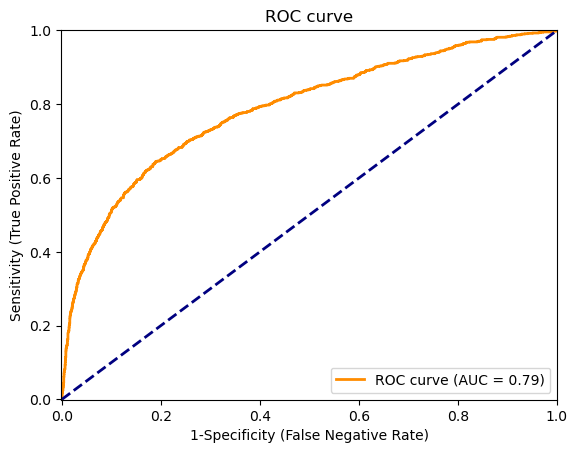

 AUC: 0.7875311629760732


In [46]:
# Lets look at the model metrics
print('Metrics of the Gradient Boosting model: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred_))

print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred_)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred_)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred_)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred_)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred_)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [47]:
#The results are similar to the previous model that included the `SEX` variable,
#with a negligible difference in AUC. 
#This indicates that the `SEX` variable might not have a significant impact on the model's performance.

In [48]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAY_TO_BILL_RATIO,DELINQ_CYCLES
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,2,2,-1,-1,-2,-2,7704.0,689.0,0.089434,2
1,2,90000.0,2,2,2,34,0,0,0,0,...,0,0,0,0,0,0,101653.0,11018.0,0.108388,0
2,3,50000.0,2,2,1,37,0,0,0,0,...,0,0,0,0,0,0,231334.0,8388.0,0.036259,0
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,-1,0,-1,0,0,0,109339.0,59049.0,0.540054,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,0,0,0,0,0,0,238114.0,7772.0,0.032640,0


In [49]:
# Split the data into males and females
df_male = df[df['SEX'] == 1]
df_female = df[df['SEX'] == 2]

In [50]:
df_male.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY1,PAY2,PAY3,PAY4,PAY5,PAY6,TOTAL_BILL_AMT,TOTAL_PAY_AMT,PAY_TO_BILL_RATIO,DELINQ_CYCLES
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,-1,0,-1,0,0,0,109339.0,59049.0,0.540054,0
4,5,50000.0,1,1,2,37,0,0,0,0,...,0,0,0,0,0,0,238114.0,7772.0,0.032640,0
7,8,20000.0,1,3,2,35,-2,-2,-2,-2,...,-2,-2,-2,-2,-1,-1,26919.0,14129.0,0.524871,0
11,12,250000.0,1,1,2,29,0,0,0,0,...,0,0,0,0,0,0,373591.0,18000.0,0.048181,0
13,14,20000.0,1,1,2,24,0,0,2,2,...,0,0,2,2,2,2,106161.0,6350.0,0.059815,4


# run model for males and females without SEX variable

In [51]:
# run model for males without the sex variable
X_male = df_male.drop(columns=['SEX', 'DEFAULT'])

In [52]:
# Standardize the data
scaler = StandardScaler()
X_male_scaled = scaler.fit_transform(X_male)

In [53]:
male_without_sex_prob = gb_model_2.predict_proba(X_male_scaled)[:,1] # probabilities

credit_threshold = 0.329

male_pred_gb = np.where(male_without_sex_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

In [54]:
#run model for females without the sex variable

In [55]:
X_female = df_female.drop(columns=['SEX', 'DEFAULT'])

In [56]:
X_female_scaled = scaler.fit_transform(X_female)

In [57]:
female_without_sex_prob = gb_model_2.predict_proba(X_female_scaled)[:,1] # probabilities

female_pred_gb = np.where(female_without_sex_prob > credit_threshold, 1, 0) # applying the threshold rule to classify

In [58]:
def calculate_percentages(y_test, y_pred):
    total = len(y_test)
    total_approved = sum(y_pred == 0)
    total_rejected = sum(y_pred == 1)
    percentage_approved = (total_approved / total) * 100
    percentage_rejected = (total_rejected / total) * 100
    return percentage_approved, percentage_rejected

In [59]:
# Calculate percentages for males
y_test_male = df_male['DEFAULT']
percentage_males_approved, percentage_males_rejected = calculate_percentages(y_test_male, male_pred_gb)

In [60]:
# Calculate percentages for females
y_test_female = df_female['DEFAULT']
percentage_females_approved, percentage_females_rejected = calculate_percentages(y_test_female, female_pred_gb)

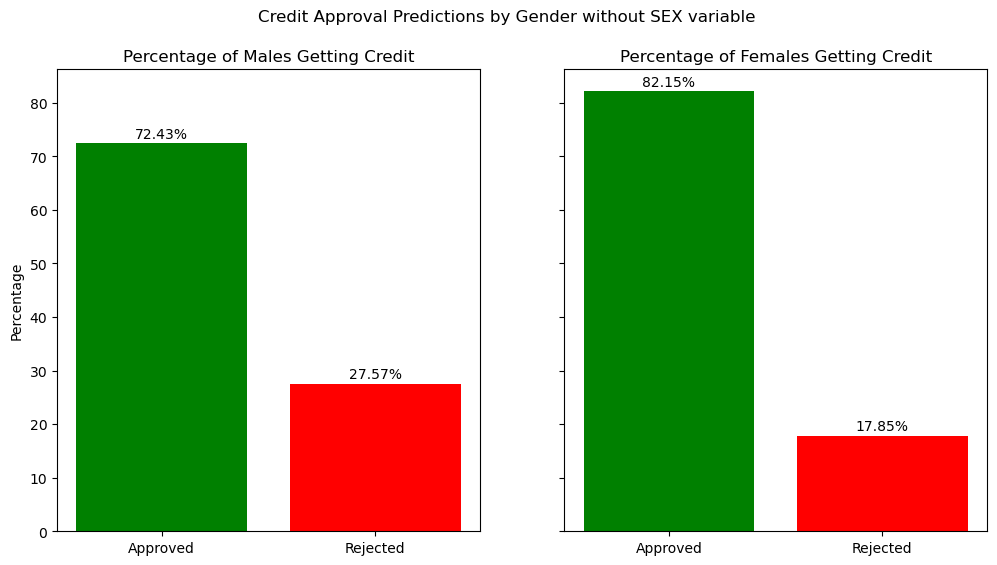

In [61]:
# Plot the percentages
labels = ['Approved', 'Rejected']
males_percentages = [percentage_males_approved, percentage_males_rejected]
females_percentages = [percentage_females_approved, percentage_females_rejected]

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax[0].bar(labels, males_percentages, color=['green', 'red'])
ax[0].set_ylabel('Percentage')
ax[0].set_title('Percentage of Males Getting Credit')
for i, v in enumerate(males_percentages):
    ax[0].text(i, v + 1, f"{v:.2f}%", ha='center')

ax[1].bar(labels, females_percentages, color=['green', 'red'])
ax[1].set_title('Percentage of Females Getting Credit')
for i, v in enumerate(females_percentages):
    ax[1].text(i, v + 1, f"{v:.2f}%", ha='center')

plt.suptitle('Credit Approval Predictions by Gender without SEX variable')
plt.show()

# run model for males and females with SEX variable

In [62]:
X_male_withsex = df_male.drop(columns=['DEFAULT'])

In [63]:
X_male_withsex_scaled = scaler.fit_transform(X_male_withsex)

In [64]:
male_with_sex_prob = gb_model.predict_proba(X_male_withsex_scaled)[:,1] # probabilities

male_withsex_pred_gb = np.where(male_with_sex_prob > credit_threshold, 1, 0)

In [65]:
X_female_withsex = df_female.drop(columns=['DEFAULT'])

In [66]:
X_female_withsex_scaled = scaler.fit_transform(X_female_withsex)

In [67]:
female_with_sex_prob = gb_model.predict_proba(X_female_withsex_scaled)[:,1] # probabilities

female_withsex_pred_gb = np.where(female_with_sex_prob > credit_threshold, 1, 0)

In [68]:
# Calculate percentages for males
percentage_males_approved, percentage_males_rejected = calculate_percentages(y_test_male, male_withsex_pred_gb)

In [69]:
# Calculate percentages for females
percentage_females_approved, percentage_females_rejected = calculate_percentages(y_test_female, female_withsex_pred_gb)

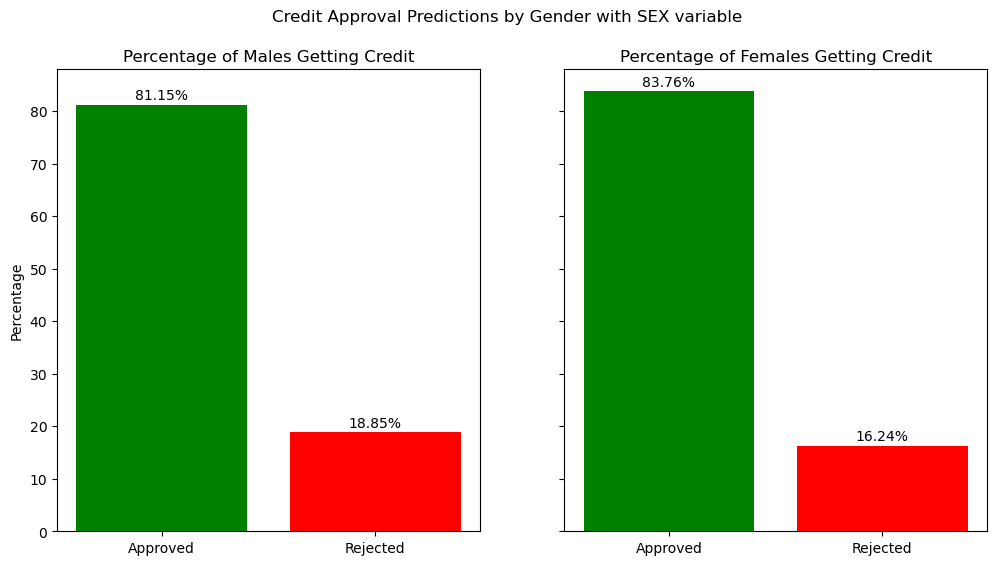

In [70]:
# Plot the percentages
labels = ['Approved', 'Rejected']
males_percentages = [percentage_males_approved, percentage_males_rejected]
females_percentages = [percentage_females_approved, percentage_females_rejected]

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax[0].bar(labels, males_percentages, color=['green', 'red'])
ax[0].set_ylabel('Percentage')
ax[0].set_title('Percentage of Males Getting Credit')
for i, v in enumerate(males_percentages):
    ax[0].text(i, v + 1, f"{v:.2f}%", ha='center')

ax[1].bar(labels, females_percentages, color=['green', 'red'])
ax[1].set_title('Percentage of Females Getting Credit')
for i, v in enumerate(females_percentages):
    ax[1].text(i, v + 1, f"{v:.2f}%", ha='center')

plt.suptitle('Credit Approval Predictions by Gender with SEX variable')
plt.show()

In [71]:
# Create a graph showing the percentage of males and females getting credit based on different thresholds
thresholds = np.linspace(0, 1, 100)

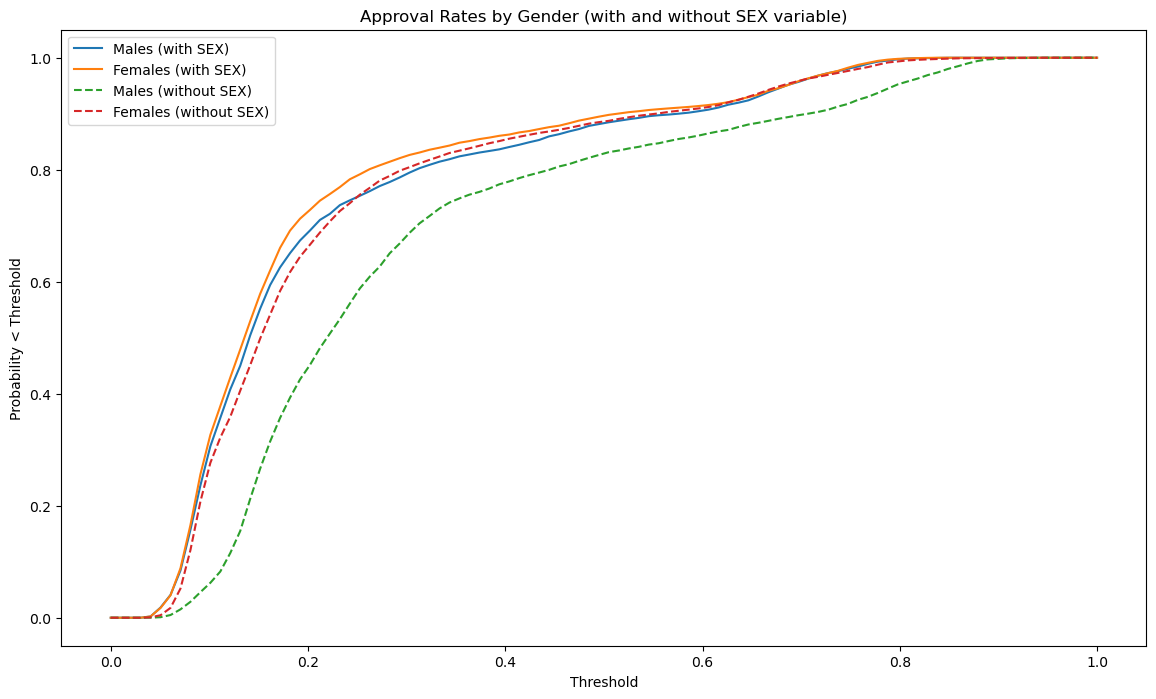

In [72]:
male_approval_rates_with_sex = [(male_with_sex_prob < t).mean() for t in thresholds]
female_approval_rates_with_sex = [(female_with_sex_prob < t).mean() for t in thresholds]
male_approval_rates_without_sex = [(male_without_sex_prob < t).mean() for t in thresholds]
female_approval_rates_without_sex = [(female_without_sex_prob < t).mean() for t in thresholds]

plt.figure(figsize=(14, 8))

plt.plot(thresholds, male_approval_rates_with_sex, label='Males (with SEX)')
plt.plot(thresholds, female_approval_rates_with_sex, label='Females (with SEX)')
plt.plot(thresholds, male_approval_rates_without_sex, label='Males (without SEX)', linestyle='dashed')
plt.plot(thresholds, female_approval_rates_without_sex, label='Females (without SEX)', linestyle='dashed')

plt.xlabel('Threshold')
plt.ylabel('Probability < Threshold')
plt.title('Approval Rates by Gender (with and without SEX variable)')
plt.legend()
plt.show()
